### Loading Data & Libraries

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [220]:
data = pd.read_csv("netflix_titles.csv")

### Show Sample Of Data

In [221]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [222]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


### Show More Info

In [223]:
data.shape

(8807, 12)

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [225]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [226]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [227]:
data.duplicated().any()

False

### Above cells' conclusion

- Columns need some modifications
- Dataset has missing values
- Dataset has no complete duplicates
- We need to remove some columns not use 

## Cleaning

### Discovering `type` column

In [228]:
data["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [229]:
data["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

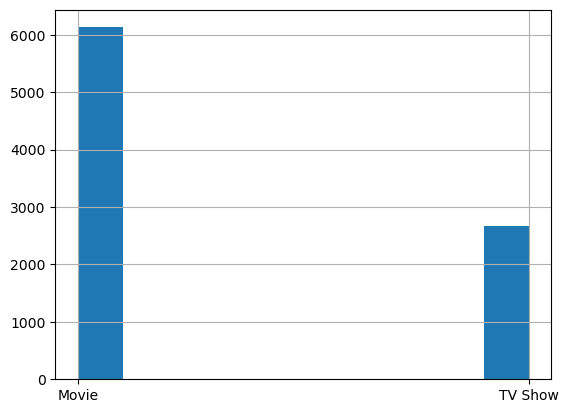

In [230]:
data["type"].hist()
plt.show()

### From the above

 Netfilx has two type `Movie`, `TV Show`
 
 - Most type is `Movie`
 - The ratio of movies to TV shows is approximately 69.6% to 30.4%
 

### Discovering `director` column

In [231]:
# show number of nan value

data["director"].isna().sum()

2634

In [232]:
# fixed nan value 

data["director"].fillna("unknown", inplace = True)

### From the above

- column has nan value
- We replace nan value with `unknown` 

### Discovering `cast` column

In [233]:
# output namber of nan value 

data["cast"].isna().sum()

825

In [234]:
# fixed nan value

data["cast"].fillna("unknown", inplace = True)

### From the above

- column has nan value
- We replace nan value with `unknown` 

### Discovering `country` column

In [235]:
data["country"].isna().sum()

831

In [236]:
# fill nan value with unknown 

data["country"].fillna("unknown", inplace = True)

### From the above

- column has nan value
- We replace nan value with `unknown` 

`United States` is the most country to watch on Netflix



### Discovering `date_added` column


In [237]:
# convert to date time

data["date_added"] =  pd.to_datetime(data["date_added"]) 

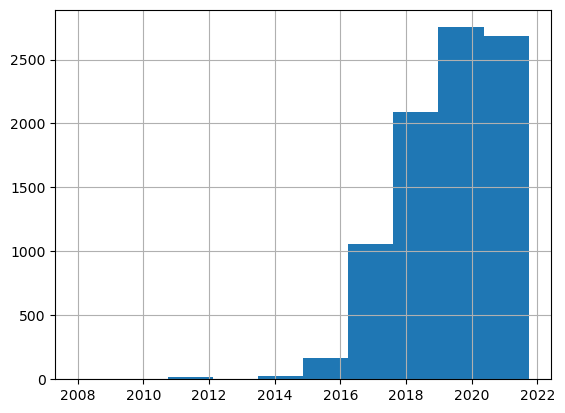

In [238]:
data["date_added"].hist()
plt.show()

### From the above

- netfilx added first show in `2008`
- most show add to netflix between `2019-2021`

### Discovering `release_year` column


In [239]:
# show unique value

data["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [240]:
# output value counts of each unique

data["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

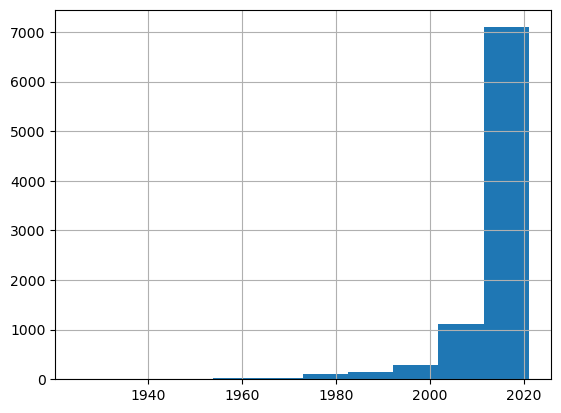

In [241]:
data["release_year"].hist()
plt.show()

### from the above

- first show release in `1925` and type is `TV Show`


- most release year of the show between `2015-2020`

###  Discovering `rating` column


In [242]:
data["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [243]:
# output number of nan value

data["rating"].isna().sum()

4

In [244]:
# fill nan value 

data["rating"].fillna("unknown", inplace = True)

In [245]:
data["rating"].value_counts().head()

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64

### From the above

- most shows on netfilx have `TV-MA` rating


###  Discovering `duration` column

In [246]:
# output number of nan value

data["duration"].isna().sum()

3

In [247]:
# fill nan value

data["duration"].fillna("unknown", inplace = True)

In [248]:
data["duration"].value_counts().head()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
Name: duration, dtype: int64

### From the above

- most shows on netfilx have `1 Season` 

### Discovering `listed_in` column


In [249]:
# output mode 

data["listed_in"].mode()[0]

'Dramas, International Movies'

# Conclusion

### 1- Shows type

- Most type is `Movie`
- The ratio of movies is 69,6%

### 2- Rating of shows and movies

- Most rating is `TV-MA`
- The ratio of TV-MA is 36.4%

#### Relation between Type and Rating

- `Movie` have higher rated than TV Show

### 3- Relation between Country and Type

- The most country show Movies, TV Show is `United States` 

### 4-  Categories of shows

- Most Categories is `Dramas, International Movies`

### 5- Relation between date added and Type

- netfilx added first show in `2008`
- most show add to netflix between `2019-2021`

### Most release year of the show between `2015-2020`

